In [4]:
import pandas as pd
import numpy as np
from benchmarks import *
import glob
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# for each of the programs/prob sizes in the explorData directory,
# load up all their CSV data

os.chdir(ROOT_DIR+'/explorData')

# extract the names and problem sizes of the done codes
dirs = list(os.listdir())

doneRuns = {}

for dir in dirs:
	progname = dir.split('-')[0]
	probsize = dir.split('-')[1]

	allJobs = glob.glob('./'+dir+'/allUniquePointsToSample.csv')[0]
	doneFiles = glob.glob('./'+dir+'/*/complete.csv')

	allData = pd.read_csv(allJobs)

	doneData = pd.DataFrame(columns=['xtime']+list(allData.columns))

	# join all the done files into one csv
	for doneFile in doneFiles:
		comp = pd.read_csv(doneFile)
		doneData = pd.concat([doneData, comp], ignore_index=True)

	doneData = doneData.reset_index(drop=True)

	# we remove this line just to get the plots up
	doneData = doneData[doneData['xtime'] != -1.0]

	# if we have all the data, let's analyze it
	if doneData.shape[0] == allData.shape[0]:
		print(progname, probsize, end='\t')
		print(doneData.shape, allData.shape)
		doneRuns[dir] = {'progname':progname, 'probsize': probsize, 'df':doneData}
	else:
		print('\t', progname, probsize, end='\t')
		print('incomplete data! Need to re-run', doneData.shape[0], allData.shape[0])





bt_nas smlprob	(1188, 6) (1188, 5)
cg_nas smlprob	(1188, 6) (1188, 5)
ft_nas smlprob	(1188, 6) (1188, 5)
bfs_rodinia smlprob	(1188, 6) (1188, 5)
hpcg smlprob	(1188, 6) (1188, 5)
lulesh smlprob	(1188, 6) (1188, 5)
cfd_rodinia smlprob	(1188, 6) (1188, 5)
bt_nas medprob	(1188, 6) (1188, 5)
cg_nas medprob	(1188, 6) (1188, 5)
ft_nas medprob	(1188, 6) (1188, 5)
bfs_rodinia medprob	(1188, 6) (1188, 5)
hpcg medprob	(1188, 6) (1188, 5)
lulesh medprob	(1188, 6) (1188, 5)
cfd_rodinia medprob	(1188, 6) (1188, 5)
	 bt_nas lrgprob	incomplete data! Need to re-run 678 1188
cg_nas lrgprob	(1188, 6) (1188, 5)
ft_nas lrgprob	(1188, 6) (1188, 5)
bfs_rodinia lrgprob	(1188, 6) (1188, 5)
	 hpcg lrgprob	incomplete data! Need to re-run 1101 1188
lulesh lrgprob	(1188, 6) (1188, 5)
cfd_rodinia lrgprob	(1188, 6) (1188, 5)


bt_nas smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
139               60         close     guided,1  11.206667
161               60        spread     guided,1  11.253333
132               60         close    dynamic,1  11.283333
154               60        spread    dynamic,1  11.303333
256              100        spread       static  11.320000
257              100        spread     static,1  11.350000
234              100         close       static  11.530000
235              100         close     static,1  11.533333
95                40         close     guided,1  11.613333
117               40        spread     guided,1  11.696667
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
366              160         close       static  25.723333
388              160        spread       static  25.710000


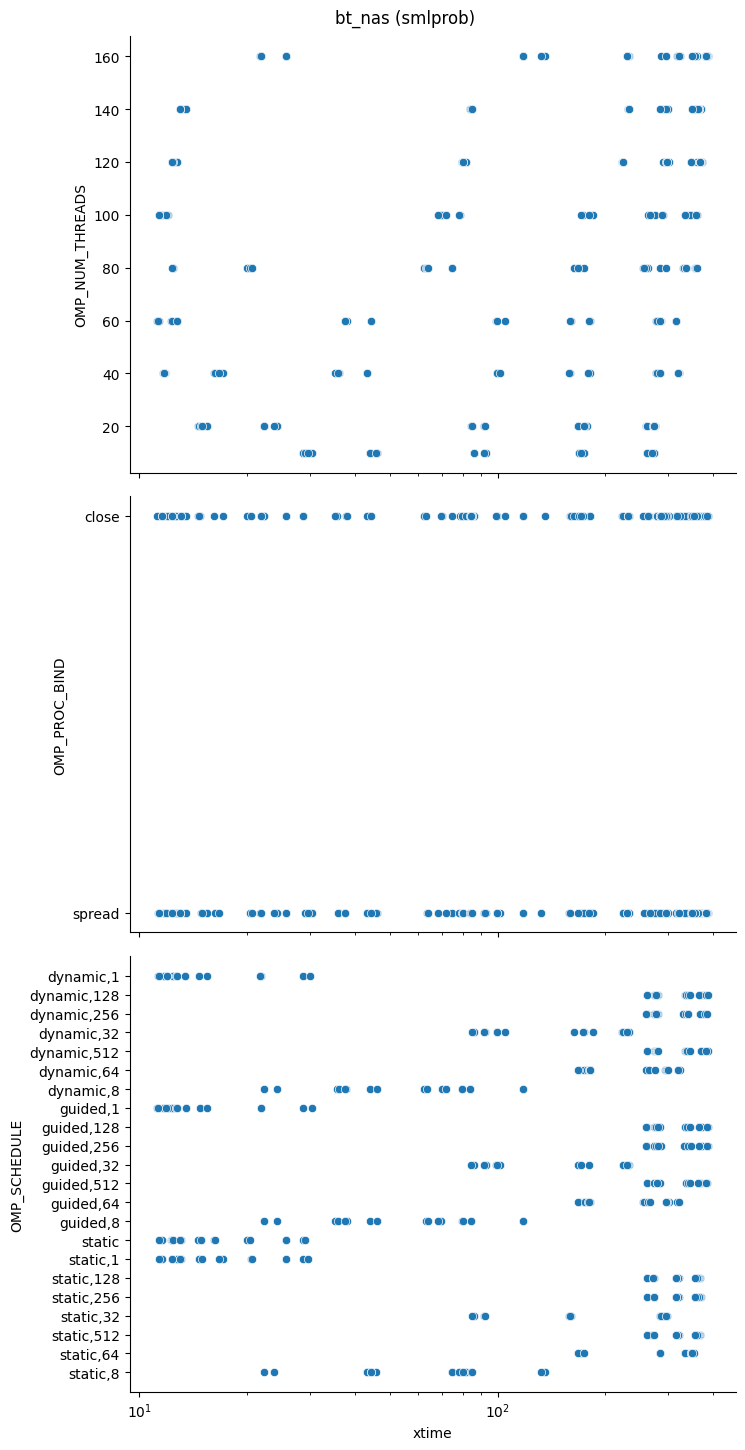

cg_nas smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
344              140        spread       static  1.880000
322              140         close       static  1.883333
234              100         close       static  2.013333
256              100        spread       static  2.033333
278              120         close       static  2.063333
328              140         close    static,64  2.080000
350              140        spread    static,64  2.086667
300              120        spread       static  2.090000
259              100        spread   static,256  2.106667
237              100         close   static,256  2.116667
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
366              160         close       static  3.586667
388              160        spread       static  3.596667


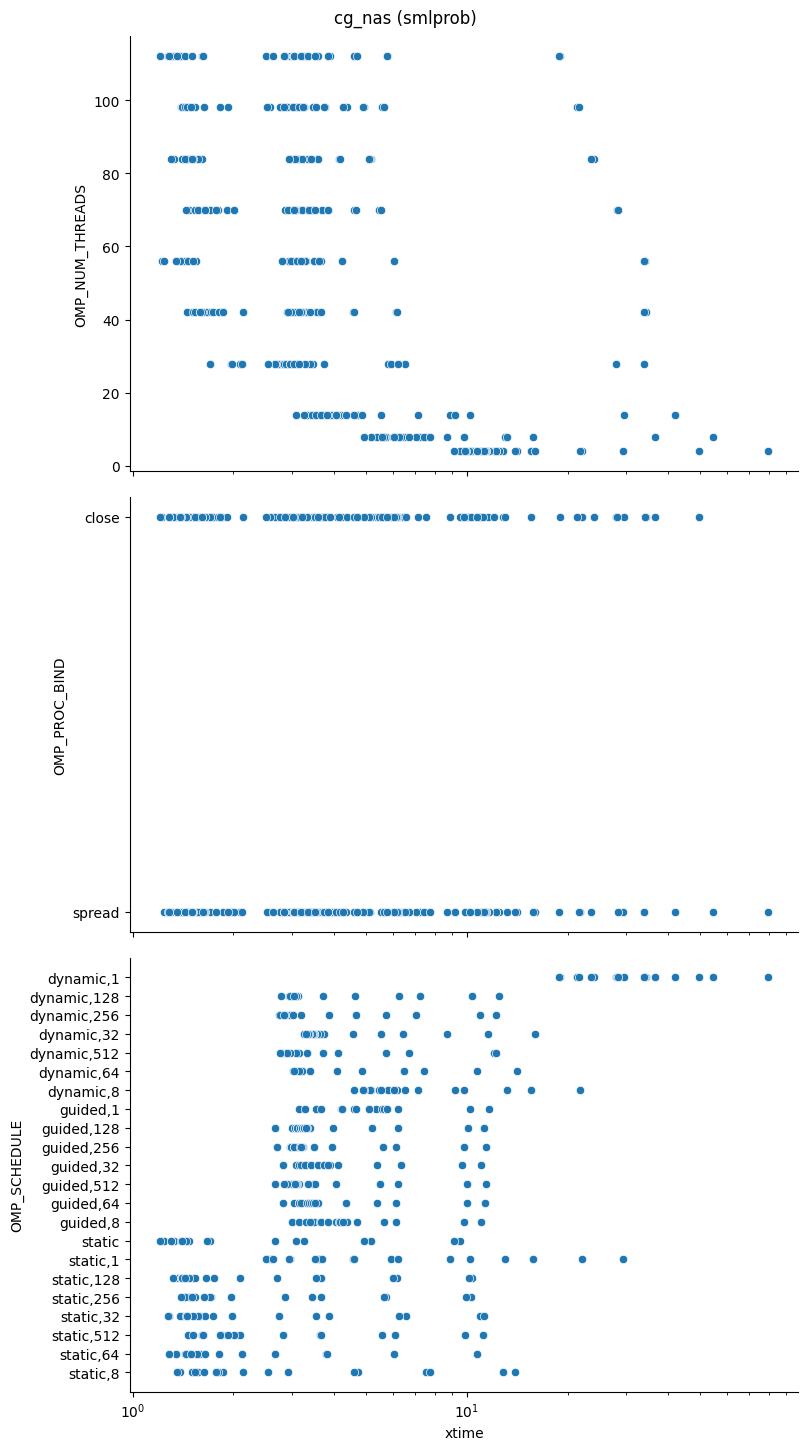

ft_nas smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
322              140         close       static  1.736667
132               60         close    dynamic,1  1.743333
161               60        spread     guided,1  1.746667
344              140        spread       static  1.750000
323              140         close     static,1  1.753333
345              140        spread     static,1  1.753333
139               60         close     guided,1  1.756667
95                40         close     guided,1  1.760000
110               40        spread    dynamic,1  1.760000
88                40         close    dynamic,1  1.763333
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
366              160         close       static  3.076667
388              160        spread       static  3.076667


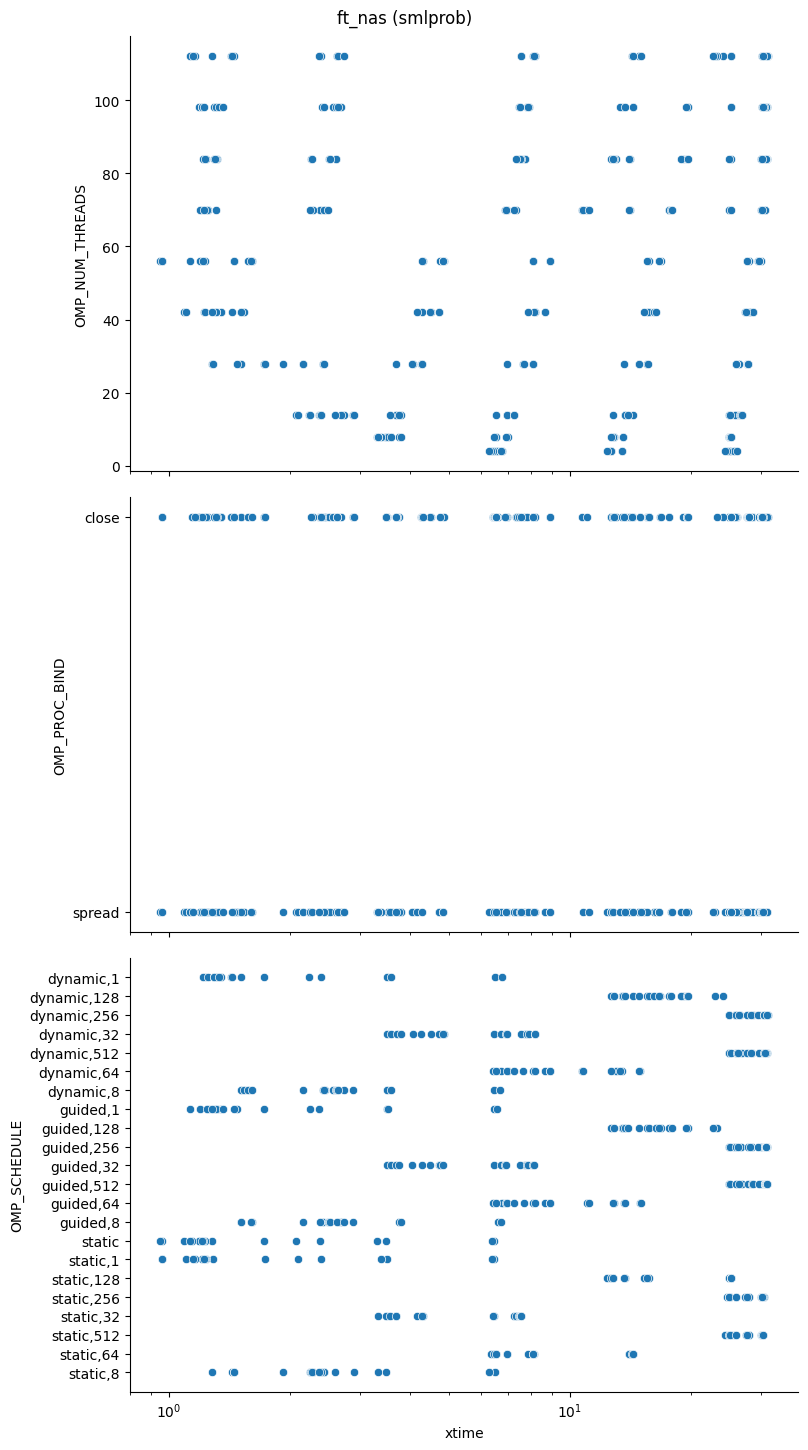

bfs_rodinia smlprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
4                10         close  dynamic,512  0.018604
12               10         close    guided,64  0.018722
14               10         close       static  0.018806
9                10         close   guided,256  0.018820
7                10         close     guided,1  0.018884
3                10         close   dynamic,32  0.018893
10               10         close    guided,32  0.018898
8                10         close   guided,128  0.018899
5                10         close   dynamic,64  0.018910
30               10        spread   guided,128  0.018922
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
366              160         close       static  0.043210
388              160        spread       static  0.044015


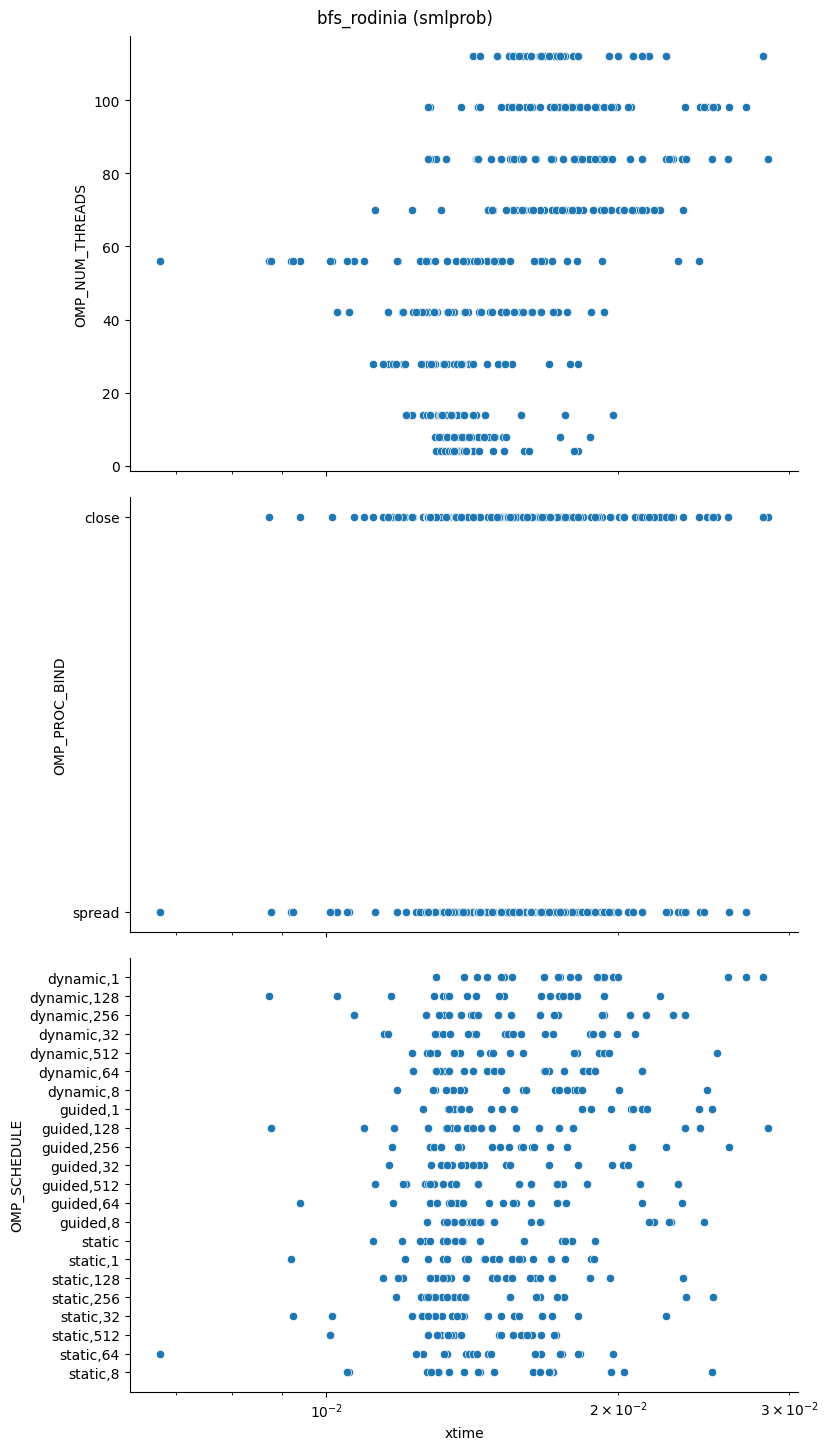

hpcg smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
99                14         close    static,32  0.160636
52                 8         close       static  0.161670
44                 8         close  dynamic,512  0.162050
95                14         close       static  0.163003
296               84         close   guided,512  0.163153
284               70        spread     static,8  0.163287
19                 4         close     static,8  0.163491
100               14         close   static,512  0.163648
54                 8         close   static,128  0.163991
115               14        spread       static  0.164201


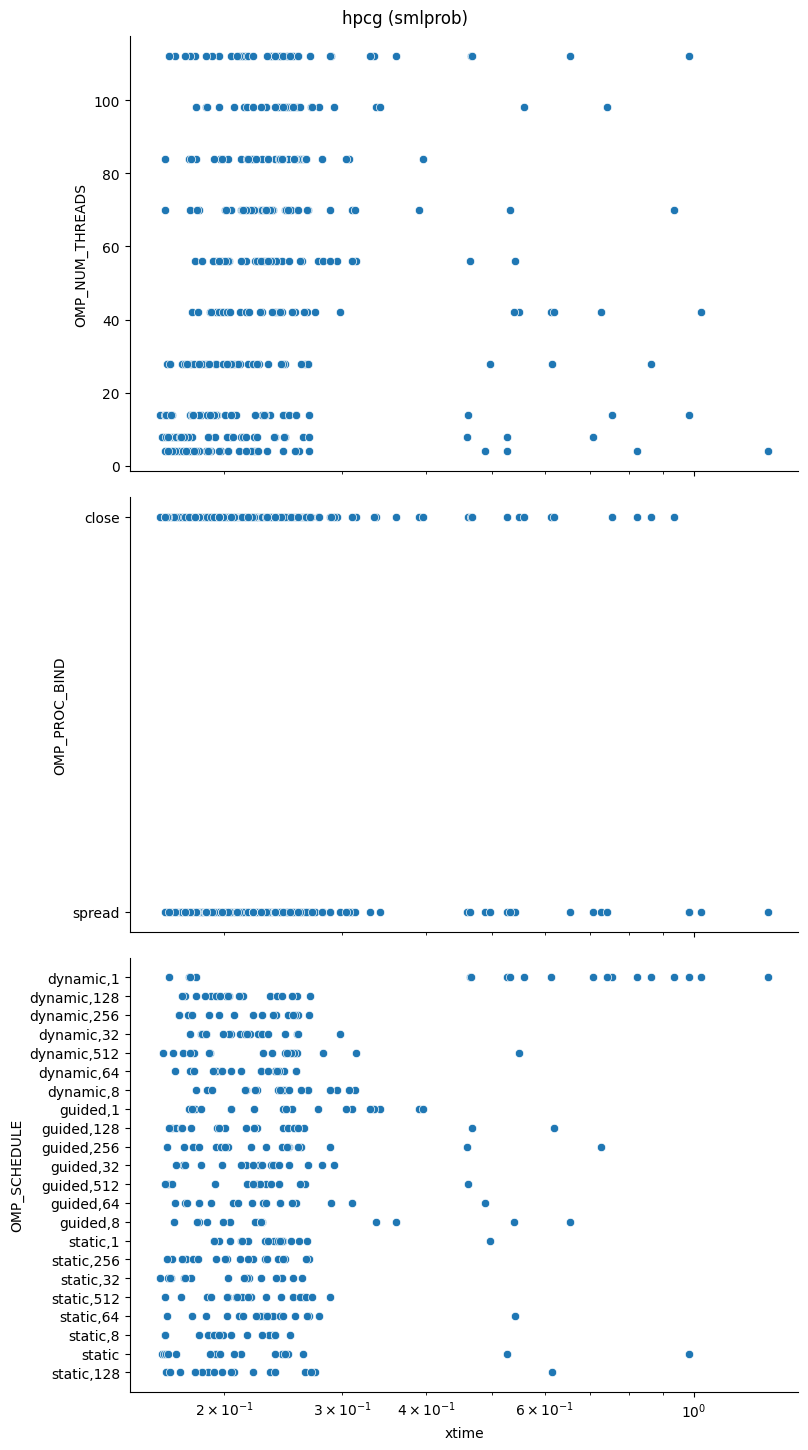

lulesh smlprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
61               20         close   static,256  0.247674
64               20         close    static,64  0.247890
60               20         close   static,128  0.247981
58               20         close       static  0.248161
63               20         close   static,512  0.248670
62               20         close    static,32  0.249193
19               10         close   static,512  0.252131
17               10         close   static,256  0.252213
16               10         close   static,128  0.252706
20               10         close    static,64  0.253800
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
366              160         close       static  1.294477
388              160        spread       static  1.312007


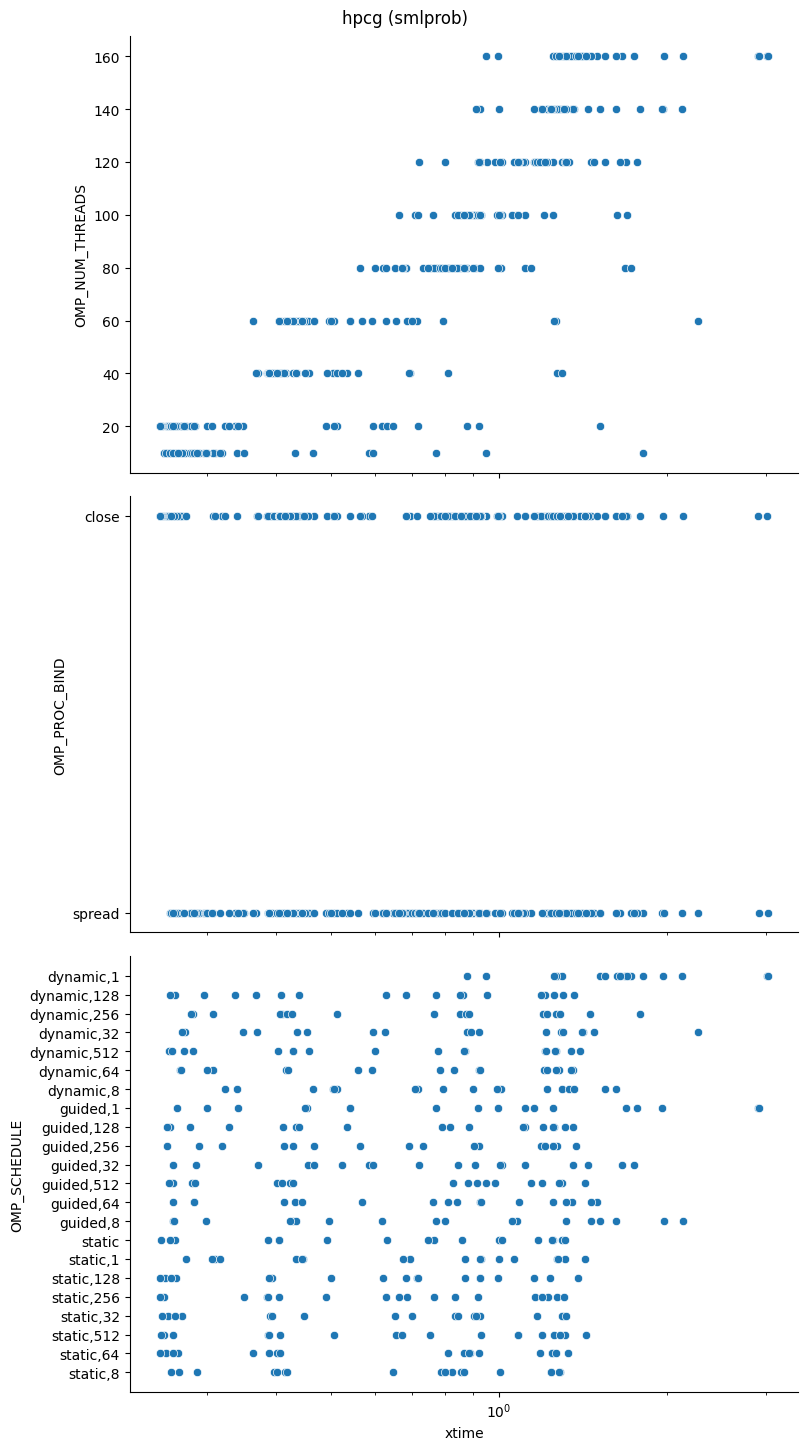

lulesh smlprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
14               10         close       static  7.788588
20               10         close    static,64  7.850865
16               10         close   static,128  7.856808
18               10         close    static,32  7.945933
17               10         close   static,256  8.028752
19               10         close   static,512  8.549627
21               10         close     static,8  8.666942
8                10         close   guided,128  9.062618
1                10         close  dynamic,128  9.083350
9                10         close   guided,256  9.153034
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
366              160         close       static  133.202130
388              160        spread       static  134.489363


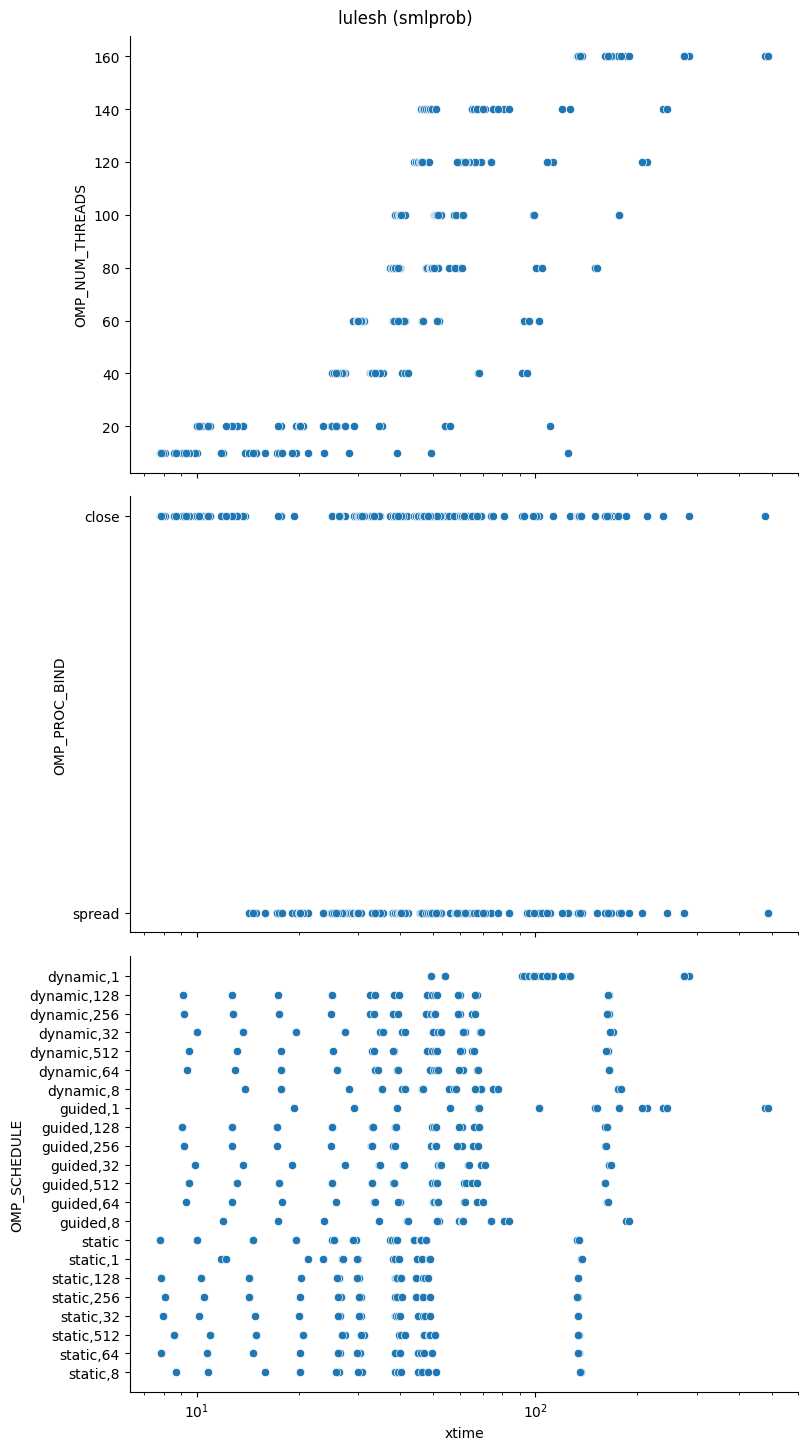

cfd_rodinia smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
278              120         close       static  3.945510
300              120        spread       static  3.958343
344              140        spread       static  3.984583
322              140         close       static  4.002757
234              100         close       static  4.162927
256              100        spread       static  4.176797
117               40        spread     guided,1  4.289023
95                40         close     guided,1  4.299620
168               60        spread       static  4.565480
146               60         close       static  4.571607
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
366              160         close       static  6.553977
388              160        spread       static  6.529847


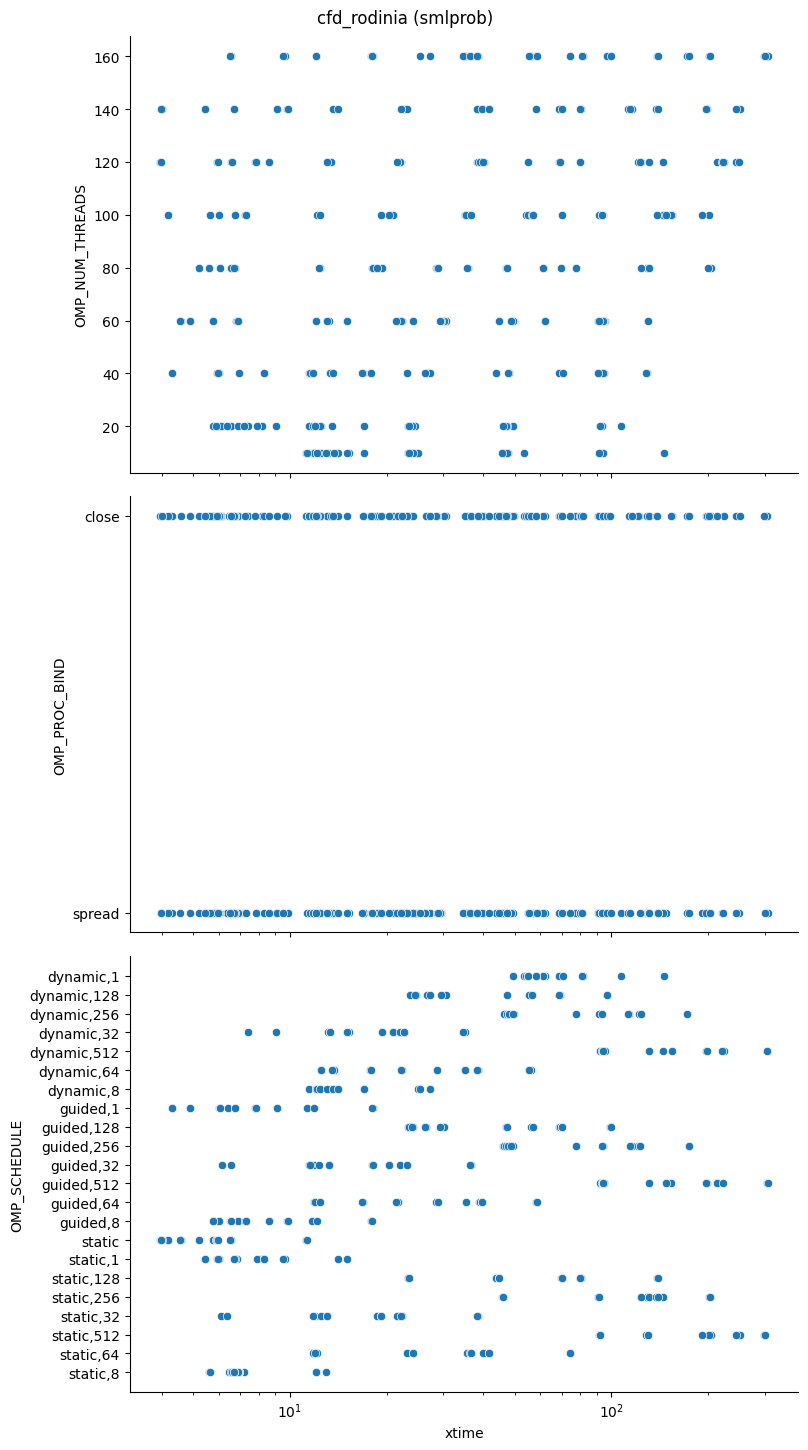

bt_nas medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
139               60         close     guided,1  45.283333
154               60        spread    dynamic,1  45.476667
132               60         close    dynamic,1  45.850000
161               60        spread     guided,1  46.136667
88                40         close    dynamic,1  48.170000
95                40         close     guided,1  48.373333
110               40        spread    dynamic,1  48.396667
117               40        spread     guided,1  48.553333
146               60         close       static  50.513333
168               60        spread       static  50.880000
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
366              160         close       static  64.913333
388              160        spread       static  65.356667


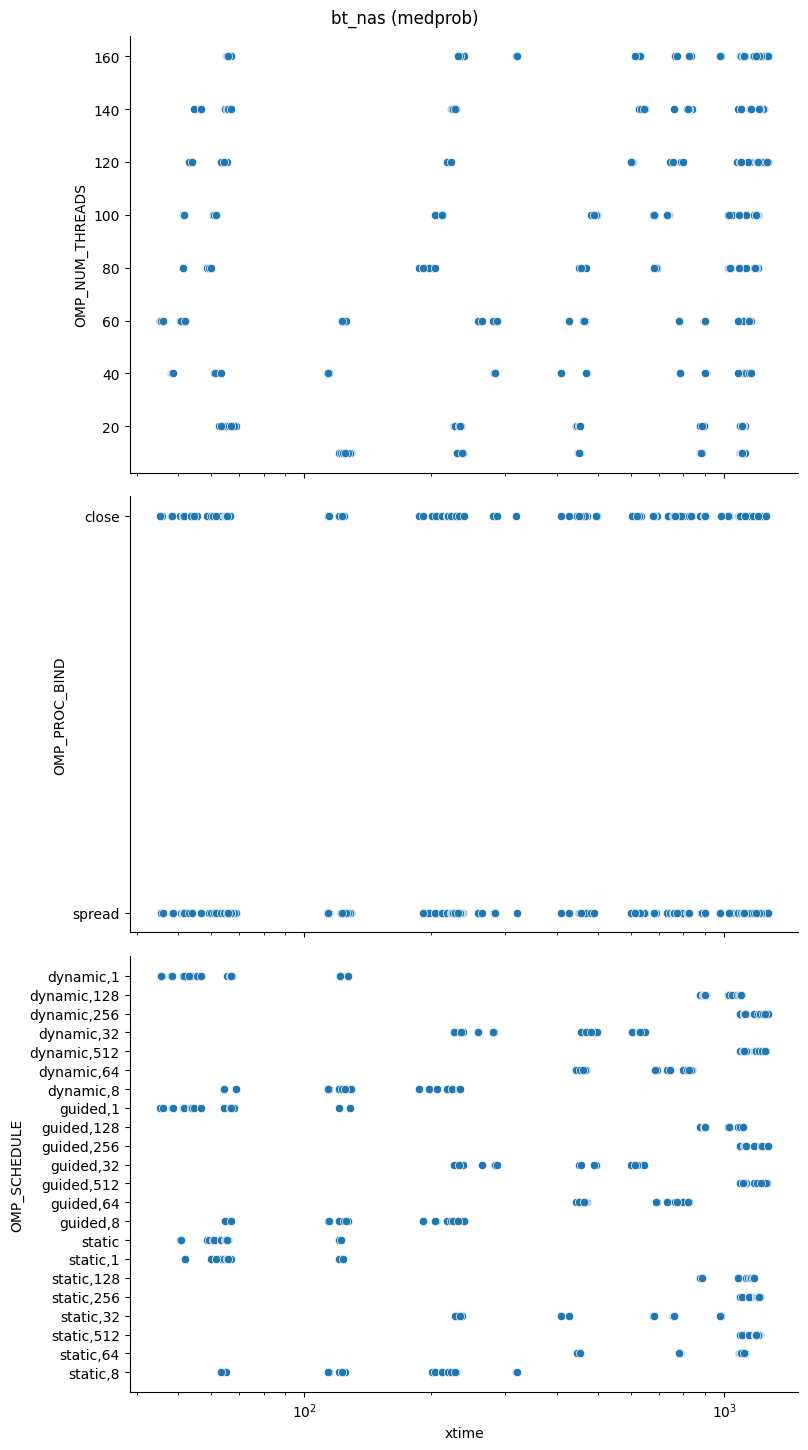

cg_nas medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
322              140         close       static  6.543333
344              140        spread       static  6.586667
328              140         close    static,64  6.963333
350              140        spread    static,64  7.026667
346              140        spread   static,128  7.116667
300              120        spread       static  7.143333
324              140         close   static,128  7.163333
278              120         close       static  7.173333
234              100         close       static  7.176667
256              100        spread       static  7.233333
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
366              160         close       static  11.353333
388              160        spread       static  11.493333


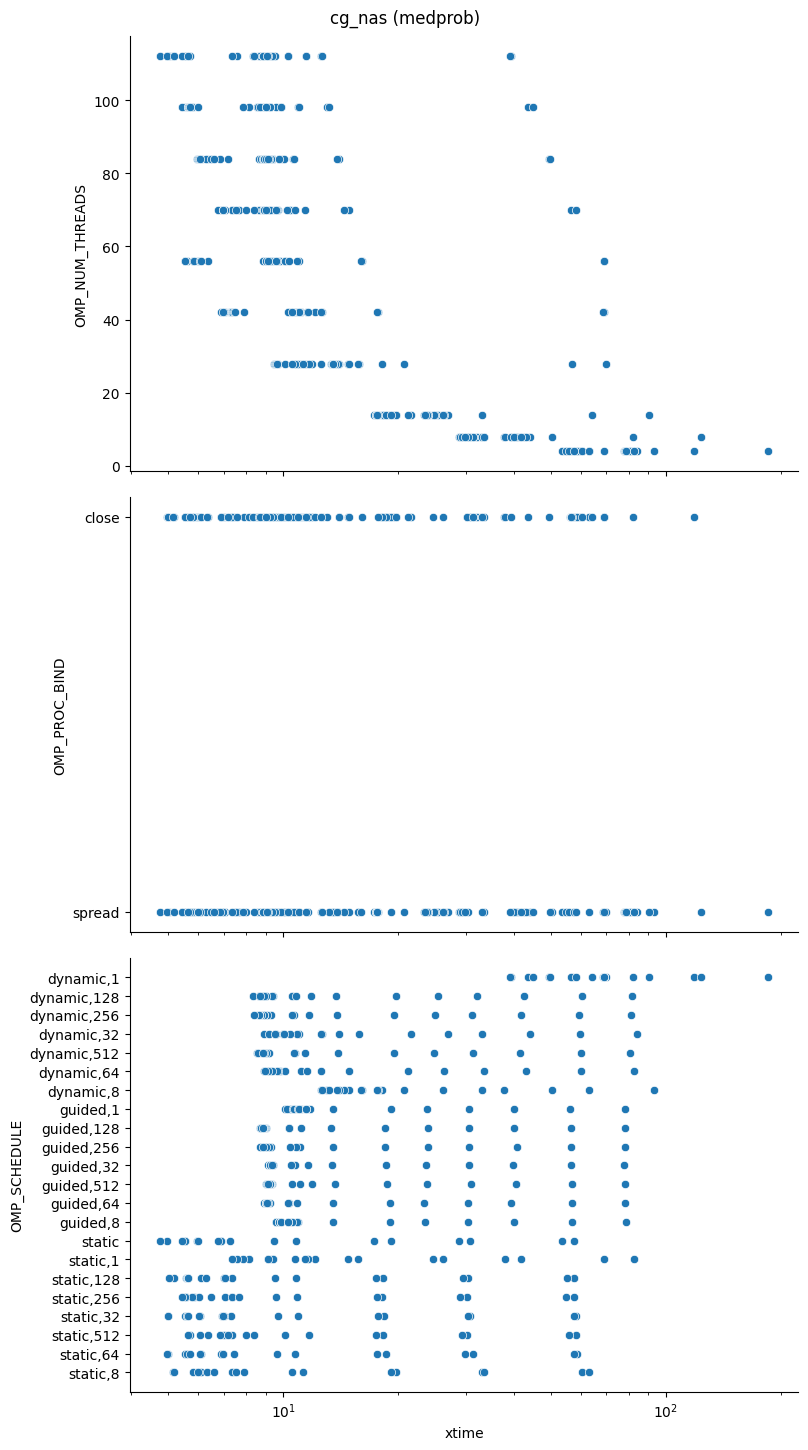

ft_nas medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
242              100        spread    dynamic,1  7.093333
249              100        spread     guided,1  7.113333
227              100         close     guided,1  7.116667
198               80        spread    dynamic,1  7.166667
183               80         close     guided,1  7.170000
176               80         close    dynamic,1  7.176667
161               60        spread     guided,1  7.180000
205               80        spread     guided,1  7.200000
154               60        spread    dynamic,1  7.206667
139               60         close     guided,1  7.223333
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
366              160         close       static  11.726667
388              160        spread       static  11.640000


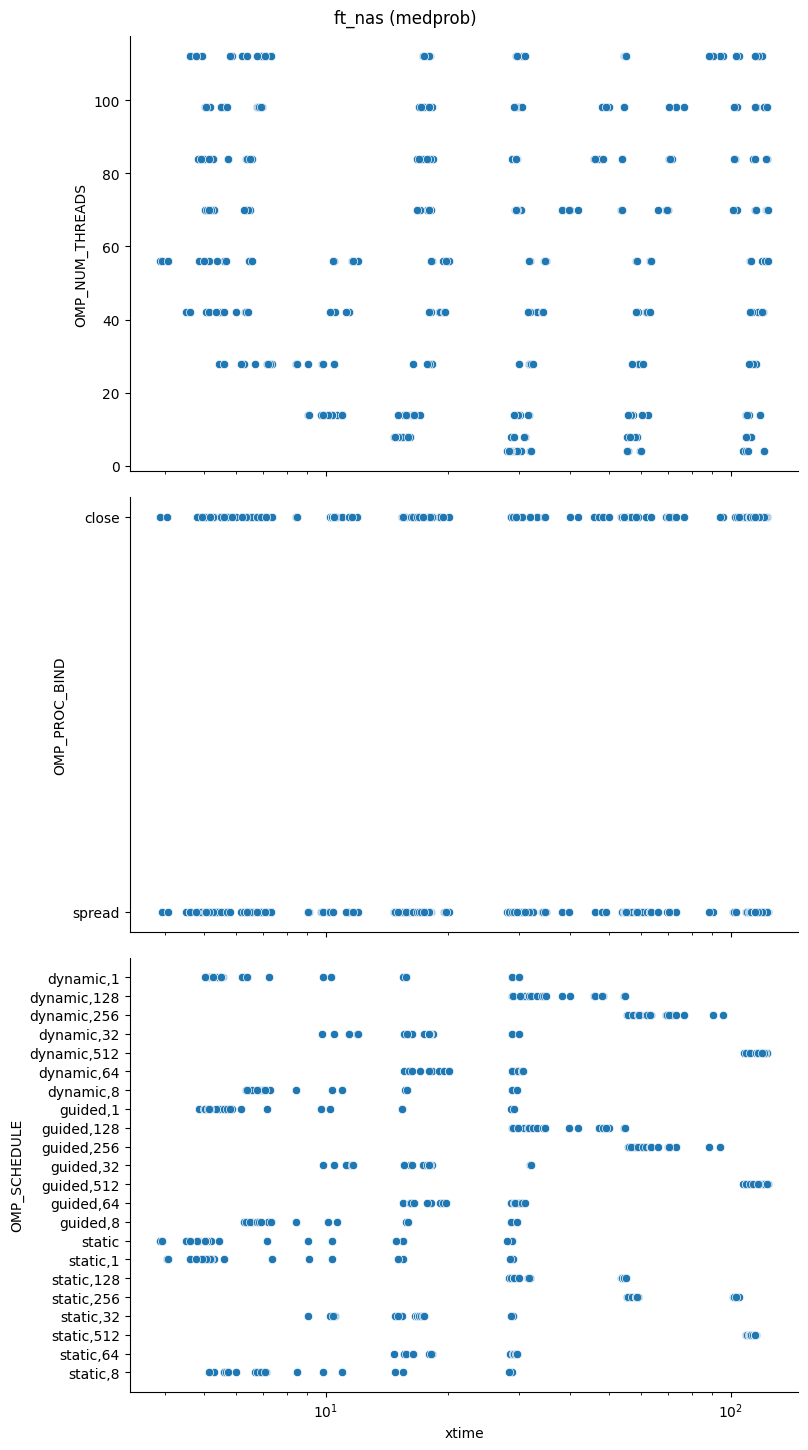

bfs_rodinia medprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
14               10         close       static  0.020487
39               10        spread   static,256  0.020678
2                10         close  dynamic,256  0.020743
9                10         close   guided,256  0.020785
36               10        spread       static  0.020875
38               10        spread   static,128  0.020878
33               10        spread   guided,512  0.020951
31               10        spread   guided,256  0.021002
34               10        spread    guided,64  0.021034
19               10         close   static,512  0.021094
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
366              160         close       static  0.062000
388              160        spread       static  0.047982


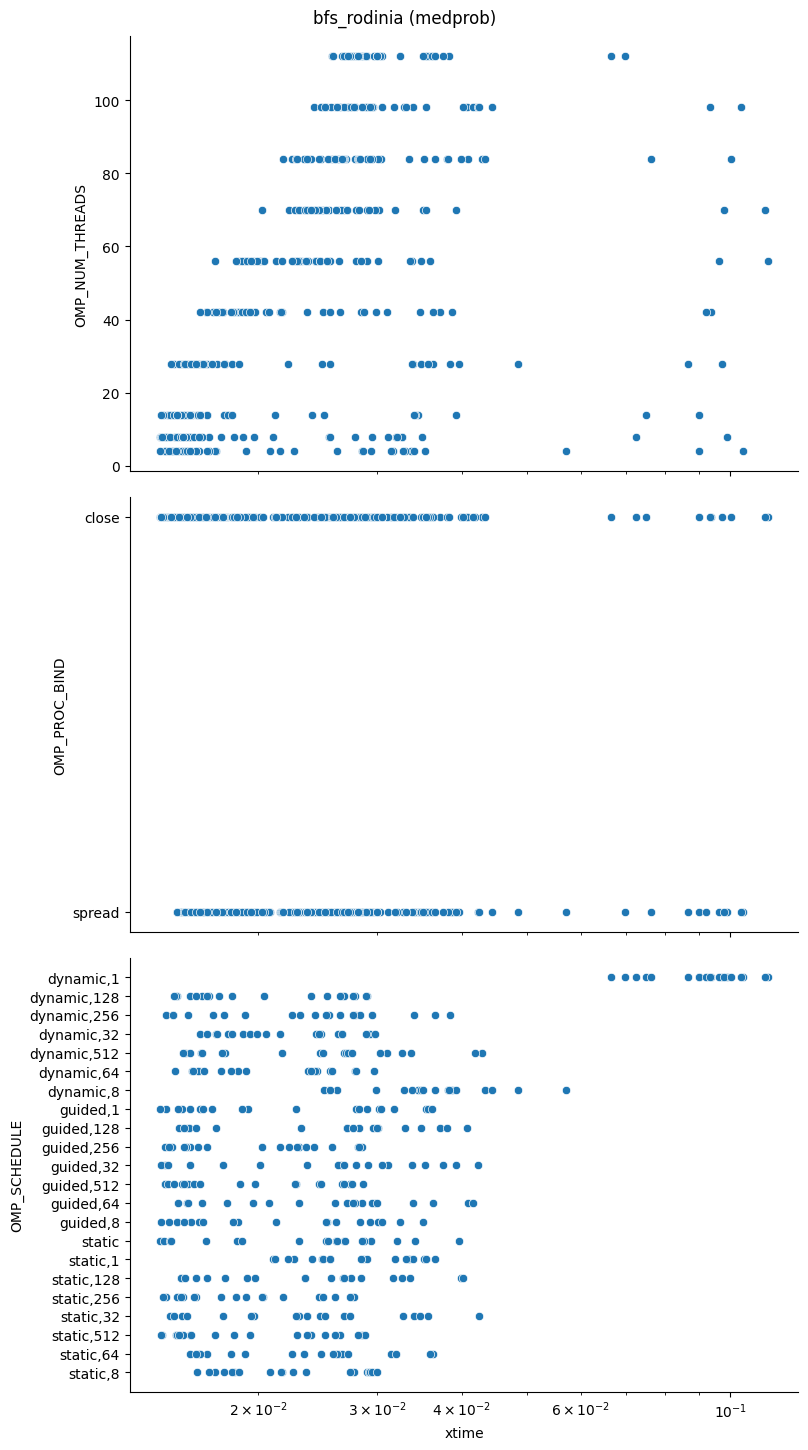

hpcg medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
1                 10         close  dynamic,128  29.338167
8                 10         close   guided,128  29.767867
4                 10         close  dynamic,512  31.172733
325              140         close   static,256  32.430300
7                 10         close     guided,1  32.856567
56                20         close    guided,64  32.924333
63                20         close   static,512  34.866300
60                20         close   static,128  35.033933
9                 10         close   guided,256  35.104267
18                10         close    static,32  35.581000
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
366              160         close       static  69.342675
388              160        spread       static  69.501350


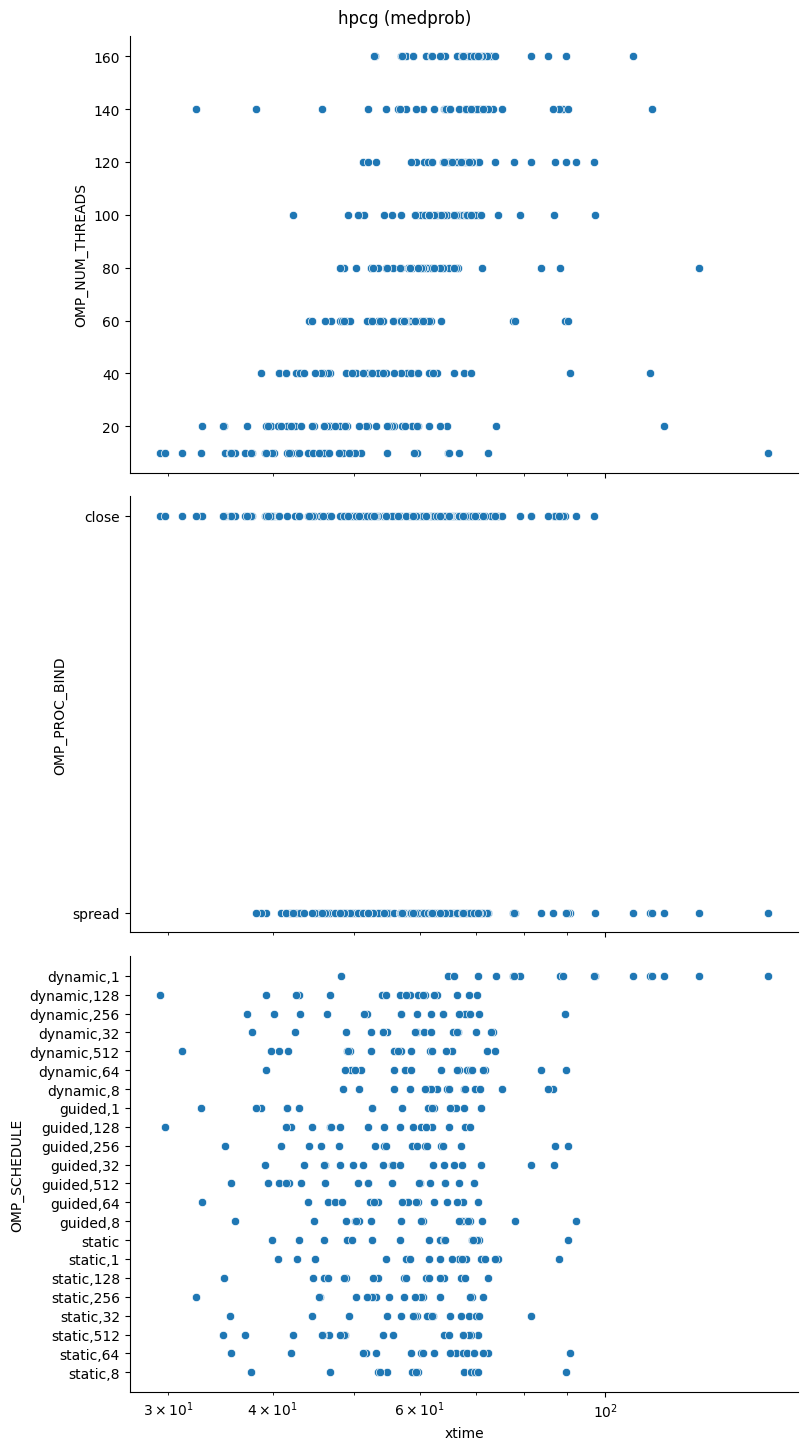

lulesh medprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
14               10         close       static  11.315089
58               20         close       static  11.415805
16               10         close   static,128  12.640185
17               10         close   static,256  12.882241
64               20         close    static,64  12.891987
20               10         close    static,64  13.043218
60               20         close   static,128  13.189101
61               20         close   static,256  13.514461
62               20         close    static,32  13.599788
18               10         close    static,32  14.000622
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
366              160         close       static  135.944087
388              160        spread       static  136.410963


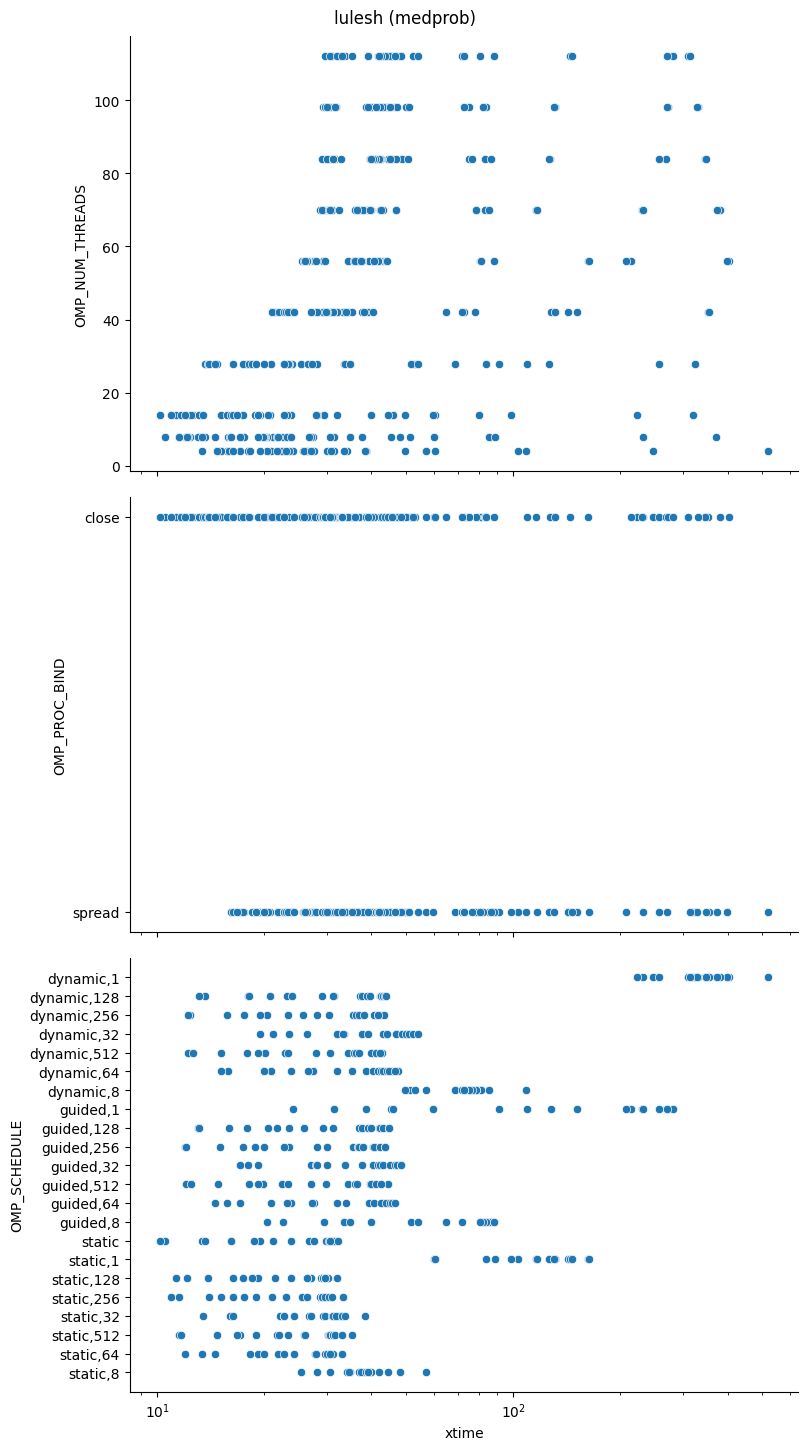

cfd_rodinia medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
322              140         close       static  11.883333
344              140        spread       static  12.195167
300              120        spread       static  13.831600
278              120         close       static  13.945467
234              100         close       static  15.383700
256              100        spread       static  15.450867
323              140         close     static,1  16.450333
345              140        spread     static,1  16.792433
249              100        spread     guided,1  17.172533
227              100         close     guided,1  17.218367
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
366              160         close       static  21.261933
388              160        spread       static  21.163933


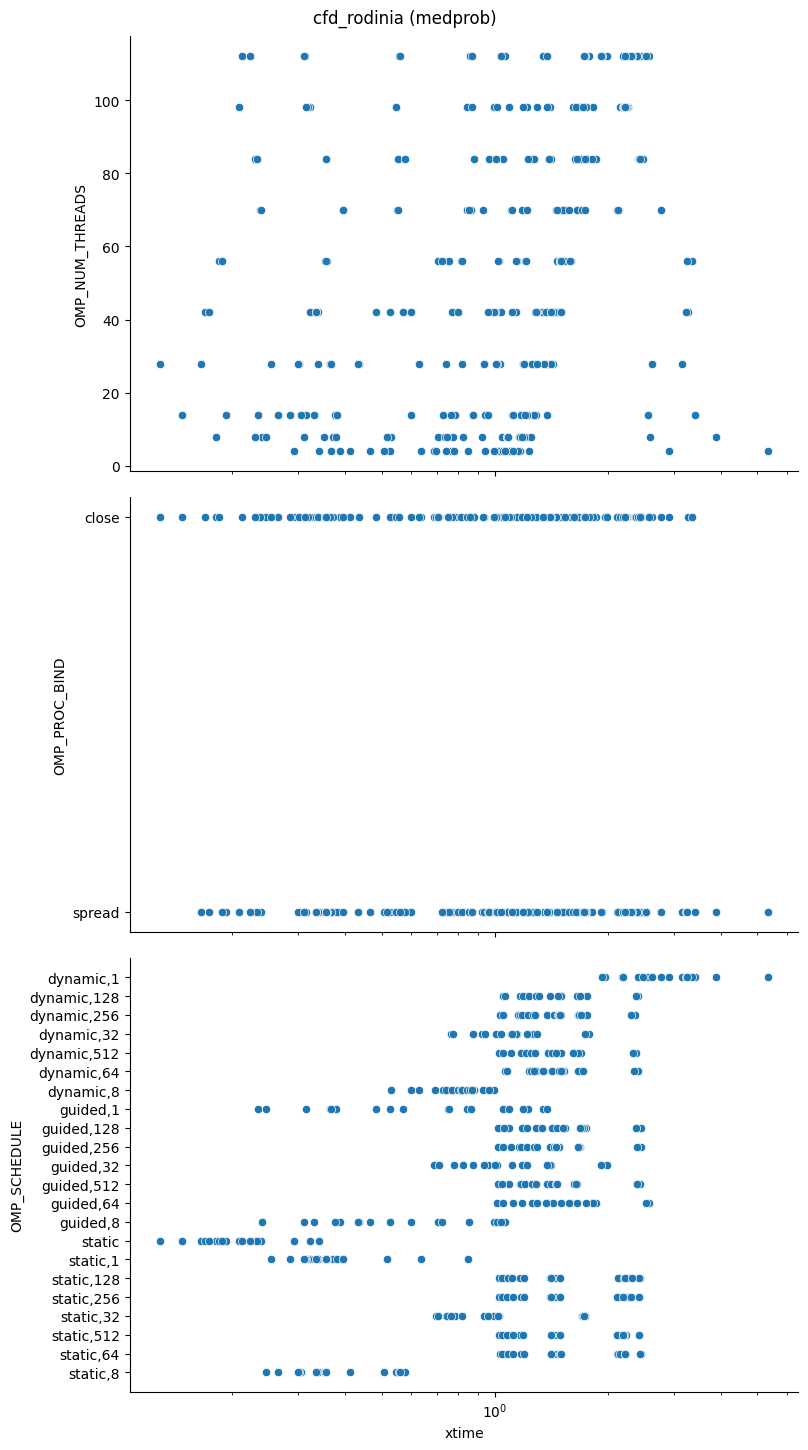

cg_nas lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
322              140         close       static  327.426667
344              140        spread       static  329.596667
327              140         close   static,512  330.953333
328              140         close    static,64  332.873333
350              140        spread    static,64  334.510000
325              140         close   static,256  334.586667
346              140        spread   static,128  334.723333
347              140        spread   static,256  334.880000
349              140        spread   static,512  337.430000
348              140        spread    static,32  337.763333
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
366              160         close       static  457.226667
388              160        spread       static  448.596667


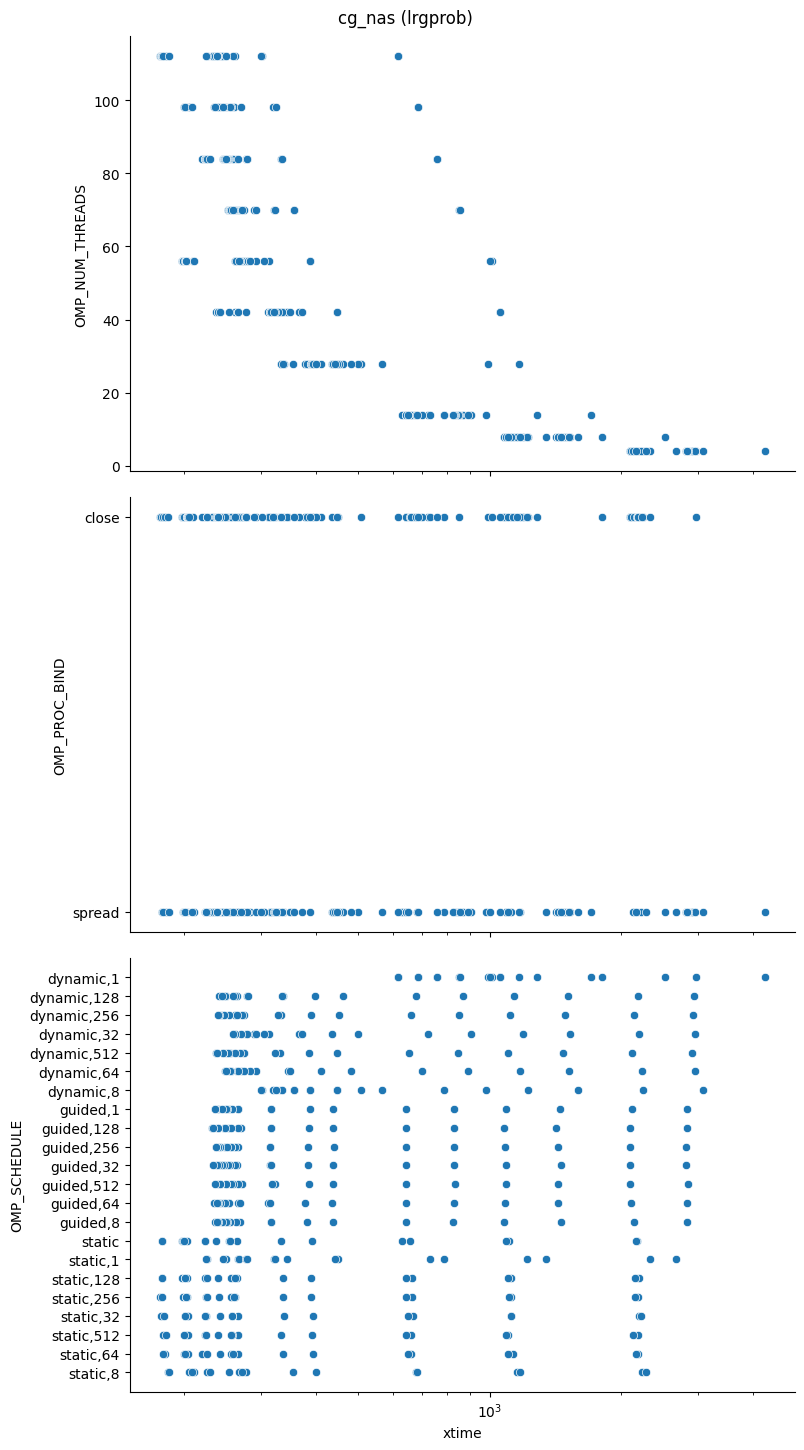

ft_nas lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
161               60        spread     guided,1  155.746667
139               60         close     guided,1  155.776667
117               40        spread     guided,1  157.126667
110               40        spread    dynamic,1  157.316667
88                40         close    dynamic,1  157.333333
95                40         close     guided,1  157.560000
132               60         close    dynamic,1  157.720000
154               60        spread    dynamic,1  157.726667
198               80        spread    dynamic,1  164.810000
176               80         close    dynamic,1  165.583333
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
366              160         close       static  256.863333
388              160        spread       static  257.563333


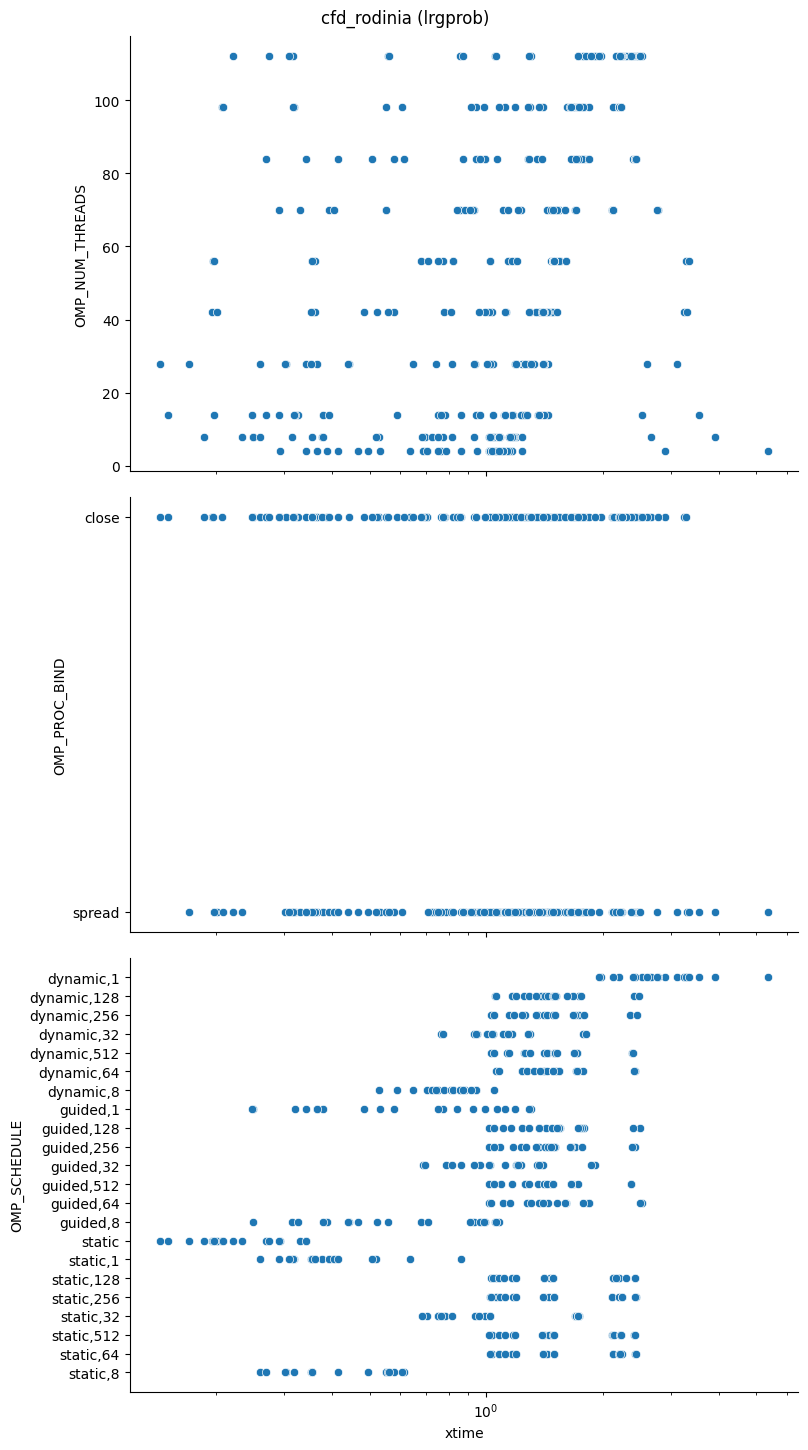

bfs_rodinia lrgprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
51               20         close     guided,1  0.027533
57               20         close     guided,8  0.027908
56               20         close    guided,64  0.028012
55               20         close   guided,512  0.028553
52               20         close   guided,128  0.028676
58               20         close       static  0.028915
53               20         close   guided,256  0.028917
54               20         close    guided,32  0.028992
63               20         close   static,512  0.029522
80               20        spread       static  0.029783
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
366              160         close       static  0.146389
388              160        spread       static  0.227544


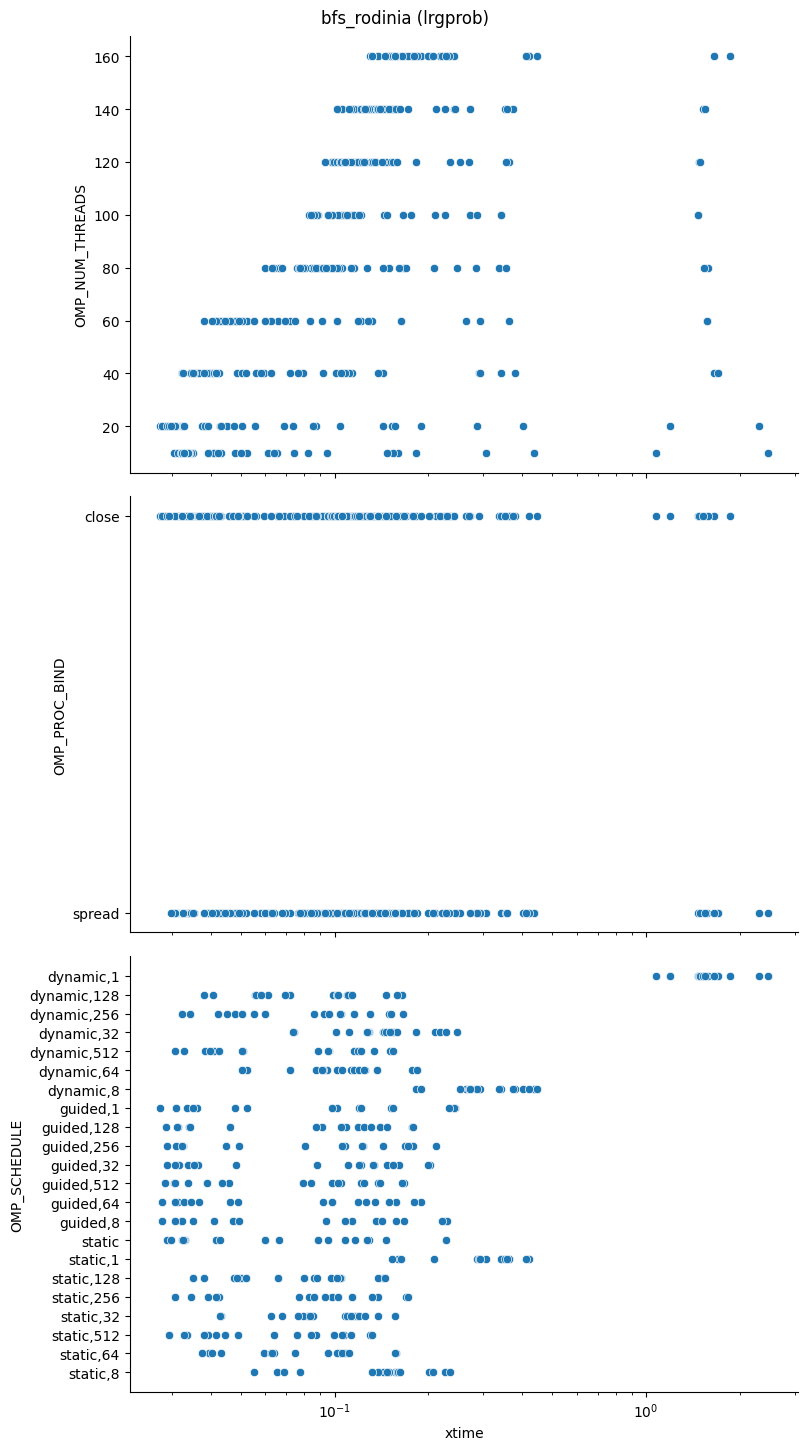

lulesh lrgprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
58               20         close       static  16.731505
61               20         close   static,256  18.694741
60               20         close   static,128  19.098556
63               20         close   static,512  20.166843
64               20         close    static,64  20.709143
14               10         close       static  20.718339
53               20         close   guided,256  21.837095
55               20         close   guided,512  22.754817
46               20         close  dynamic,256  22.986066
62               20         close    static,32  23.159552
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
366              160         close       static  142.13146
388              160        spread       static  140.96205


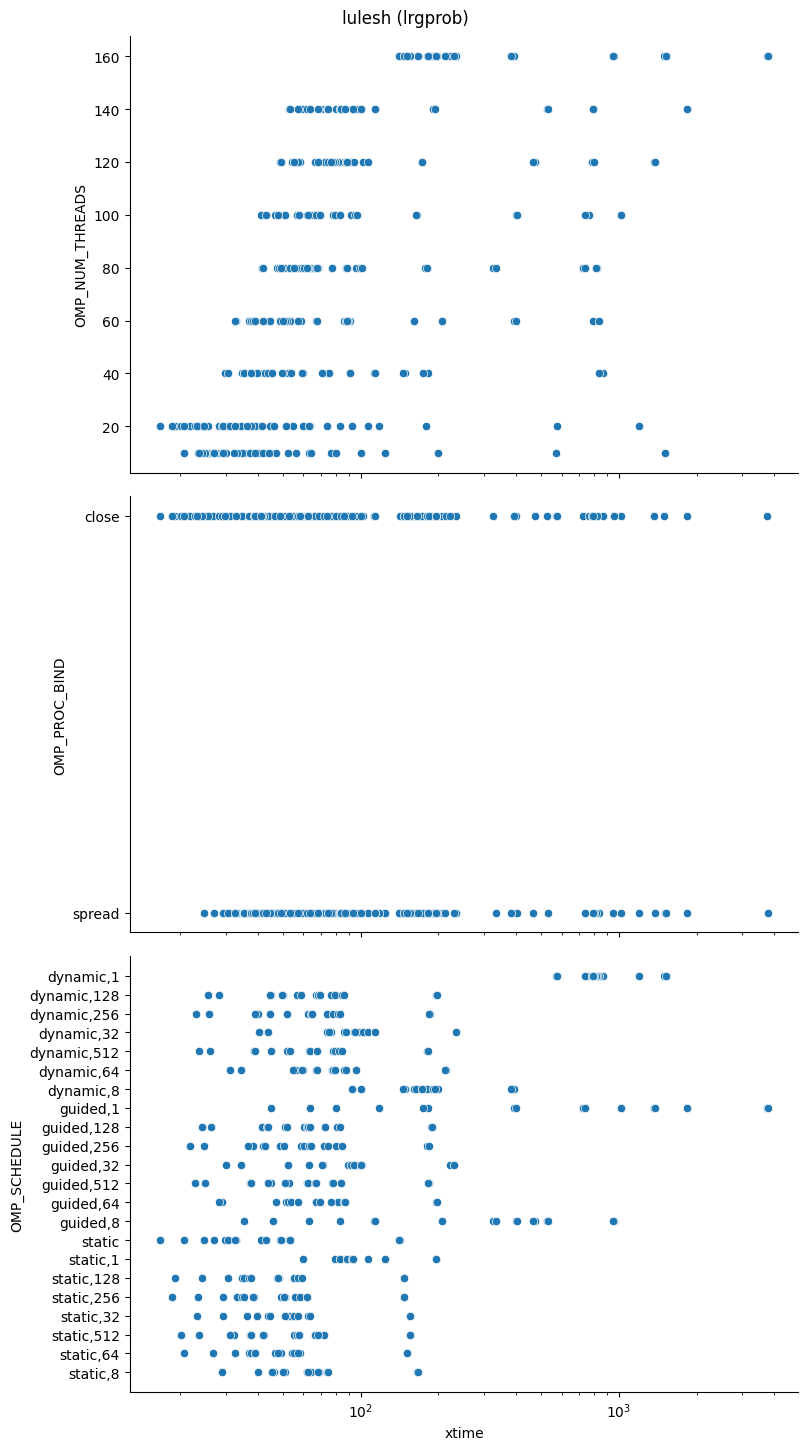

cfd_rodinia lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
322              140         close       static  25.356133
344              140        spread       static  25.463200
300              120        spread       static  28.663967
278              120         close       static  28.670367
351              140        spread     static,8  29.256733
329              140         close     static,8  29.366600
271              120         close     guided,1  30.184633
293              120        spread     guided,1  30.221133
249              100        spread     guided,1  30.624967
227              100         close     guided,1  30.677667
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
366              160         close       static  40.356267
388              160        spread       static  40.485433


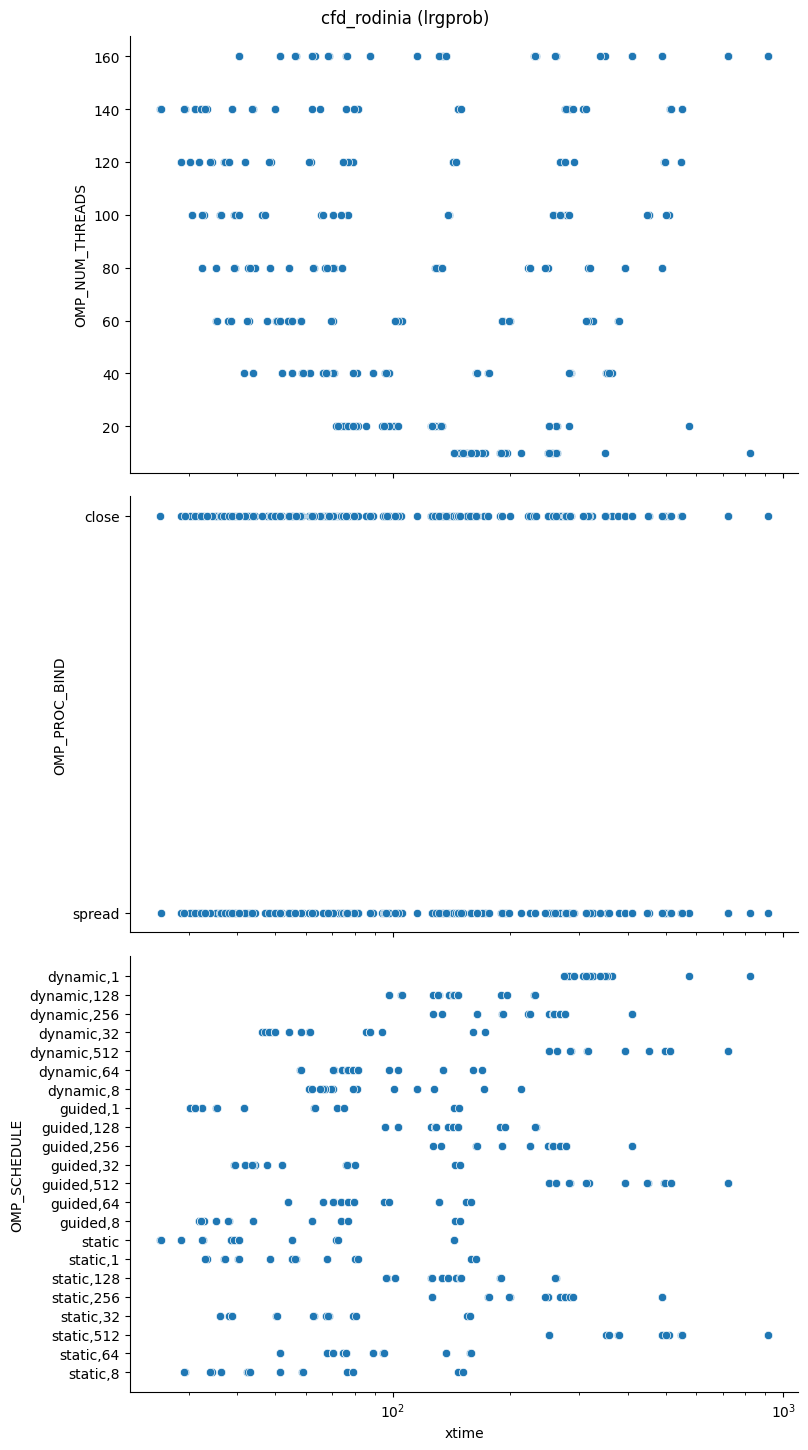

In [7]:
# for each complete run, let's plot the data

for key,values in doneRuns.items():
	progname = values['progname']
	probsize = values['probsize']
	df = values['df'].copy(deep=True)

	# drop any -1 values
	df = df[df['xtime'] != -1.0]

	# drop the progname and probsize columns
	df = df.drop(columns=['progname', 'probsize'])

	#print(df.head(), df.shape)

	hparams = list(df.columns)
	hparams.remove('xtime')

	# average out the xtimes
	avrgd = df.groupby(hparams).mean().reset_index()

	print(progname, probsize)
	# best xtime configs
	print(avrgd.sort_values(by=['xtime']).head(10))
	print(avrgd[(avrgd['OMP_NUM_THREADS'] == 160) & (avrgd['OMP_SCHEDULE'] == 'static')])

	# let's create multiple 2D plots of the xtimes
	pp = sns.pairplot(avrgd, y_vars=hparams, x_vars=['xtime']) 
	pp.fig.set_size_inches(15,15)
	pp.fig.suptitle(progname+' ('+probsize+')', x=0.7, y=0.999)

	for ax in pp.axes.flat:
		if ax.get_ylabel() in hparams:
			ax.set(xscale='log')

	plt.show()


	
	
